C:\Users\tarun\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


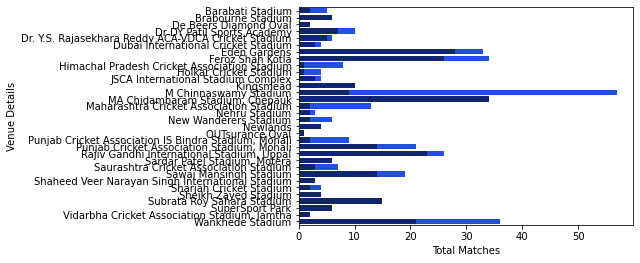

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the matches.csv file and storing it in a dataframe.
match_data = pd.read_csv('matches.csv')

# Taking the data from the match_data and assigning it to the data1 variable.
data1 = pd.DataFrame(match_data,columns=['venue','toss_decision'])

# This code is selecting all the records in the data1 dataframe where the value of the toss_decision
# column is equal to 'field'.
field = data1[(data1['toss_decision']== 'field')]
field.rename(columns={'toss_decision': 'fielding_choice'}, inplace=True)
field_count = field.groupby('venue').count()

bat = data1[(data1['toss_decision']== 'bat')]
bat.rename(columns={'toss_decision': 'batting_choice'}, inplace=True)
bat_count = bat.groupby('venue').count()

# Merging two dataframes on a common column
decisions = pd.merge(field_count, bat_count, on="venue")

# Adding the two columns together to create a new column called "Total_Matches"
decisions["Total_Matches"] = decisions["fielding_choice"] + decisions["batting_choice"]

# Adding a new column to the dataframe called venue and setting it equal to the index.
decisions['venue'] = decisions.index

# Plotting the number of times a player chose a fielding decisions Vs Venue.
sns.set_color_codes("bright")
ax1=sns.barplot(x="fielding_choice", y="venue", data=decisions, color="b")

sns.set_color_codes("dark")
ax2=sns.barplot(x="batting_choice", y="venue", data=decisions, color="b")

# Creating a bar chart.
ax1.set(xlabel='Total Matches', ylabel='Venue Details')
ax2.set(xlabel='Total Matches', ylabel='Venue Details')

# Plotting the data
plt.show()